# **Dataset Description**
**Customer Segmentation Clustering**

Tujuan dari project ini adalah untuk menemukan pola dari perilaku customer dan dibagi menjadi beberapa cluster untuk bisa menjadi sebuah insight.


**Ket. Dataset**
*   CustomerID = Identitas tiap customer
*   Gender = Jenis kelamin customer
*   Age = Umur customer
*   Annual Income = Income per tahun
*   Spending Score = Score customer dalam membelanjakan uang mereka (1-100)

### Download/Copy Dataset

In [ ]:
# Get dataset https://drive.google.com/file/d/1TMqMjaISMkGxJ-mbJVWPte-i2ba4EuOV/view?usp=sharing

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Read Data from G-Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset18_Clustering_Customer.csv to Dataset18_Clustering_Customer (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Dataset18_Clustering_Customer.csv']))
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
#Read dataset
# df = pd.read_csv('/content/drive/MyDrive/Digital Skola/Dataset18_Clustering_Customer.csv')
# df.head()

# **Data Understanding & EDA**

In [ ]:
#check columns & rows
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.rename(columns={'Annual Income (k$)' : 'Annual_Income', \
                   'Spending Score (1-100)' : 'Spending_Score'}, inplace=True)

In [ ]:
#Check null values
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Stat descriptive
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


**Key Takeaway:**

Rata usia 38.9 tahun dengan income pertahunnya 60k$, menyebar dari 15k$ hingga 137k% dengan tingkat daya beli rendah

In [ ]:
df.describe(include=['O'])

,Gender
count,200
unique,2
top,Female
freq,112


**Key Takeaway :**

Text(0.5, 1.0, 'Correlation Matrix Antarvariable')

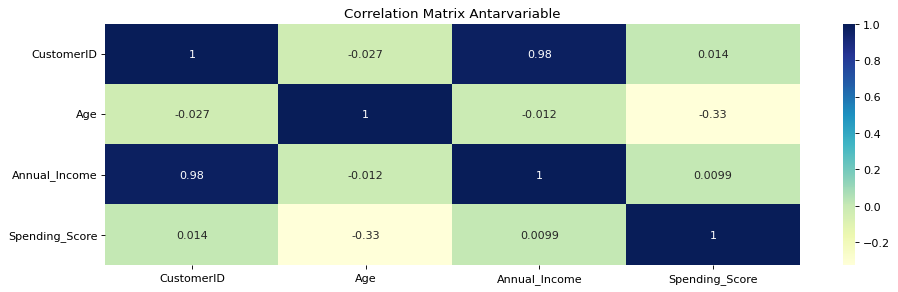

In [ ]:
# Show correlation between feature
fig, ax = plt.subplots(figsize=(14,4), dpi=80)
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix Antarvariable')

**Key Takeaway :**

Hipotesis awal
- Age vs Spending Score (negative correlation): Semakin tua umur customer semakin jarang mengeluarkan uangnya, Semakin muda semakin sering mengeluarkan uangnya
- Semakin tinggi income tahunan semakin besar daya beli


# **Data Visualization**

**Gender**

In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

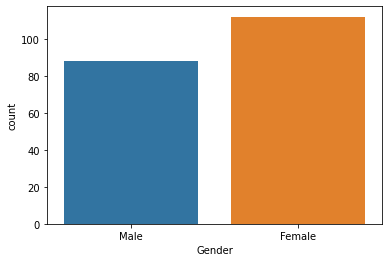

In [ ]:
sns.countplot(df['Gender'])

Key Takeaway:

- Perempuan lebih sering ke mall dibandingkan laki-laki

**Age**

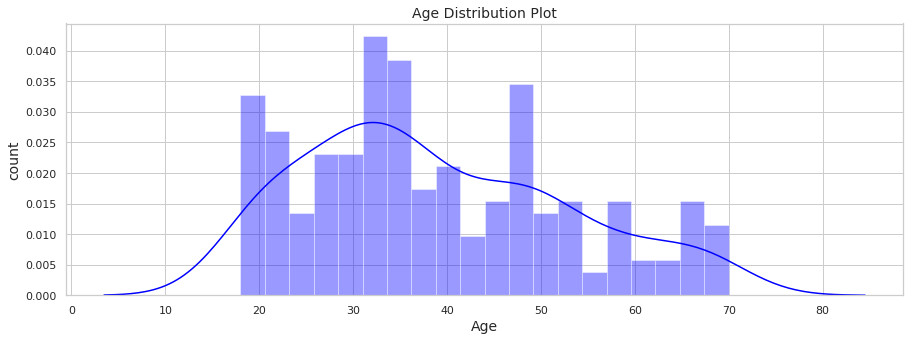

In [ ]:
# Distribution plot
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.distplot(df['Age'], color = "blue", bins=20)
plt.title("Age Distribution Plot", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

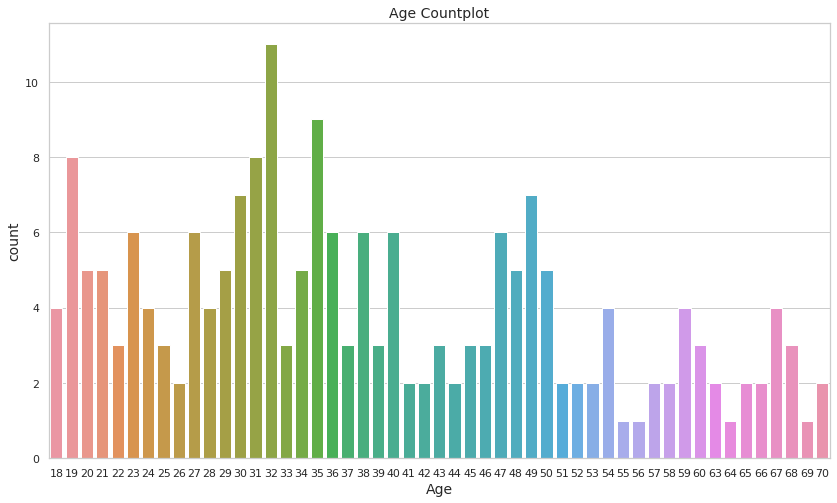

In [ ]:
# Countplot
plt.figure(figsize=(14,8))
sns.countplot(df['Age'])
plt.title("Age Countplot", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

**Key Takeaway :**

- Mayoritas customer berusia 30-40 tahun
- Usia menyebar dari 18-70 tahun
- Usia di bawah 18 mungkin belum memiliki card id/ member card

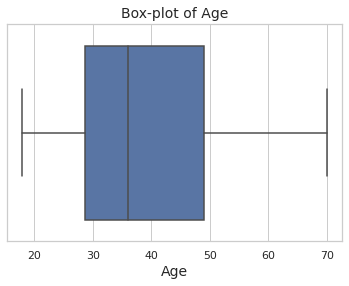

In [ ]:
# Box plot
sns.boxplot(df['Age'])
plt.title("Box-plot of Age",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.show()

**Key Takeaway :**

- Usia customer skewed positive, artinya yang berkunjung ke mall kebanyakan customer berusia muda


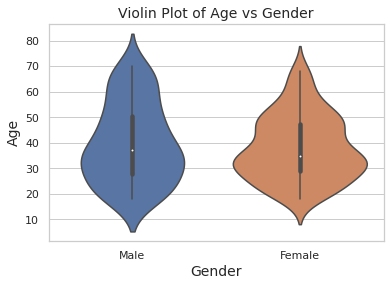

In [ ]:
# Violin Plot
sns.violinplot(y="Age", x ="Gender", data = df)
plt.title("Violin Plot of Age vs Gender", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.show()

**Key Takeaway :**

- Di Usia 30-40 tahun mayoritas customer adalah wanita
- Di Usia mendekati 60-80 tahun mayoritas customer adalah pria




**Annual income**

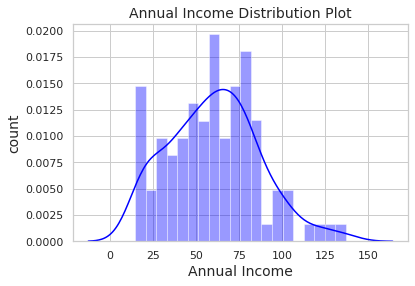

In [ ]:
# Distribution plot
sns.set(style="whitegrid")
sns.distplot(df['Annual_Income'], color = "blue", bins=20)
plt.title("Annual Income Distribution Plot", fontsize=14)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

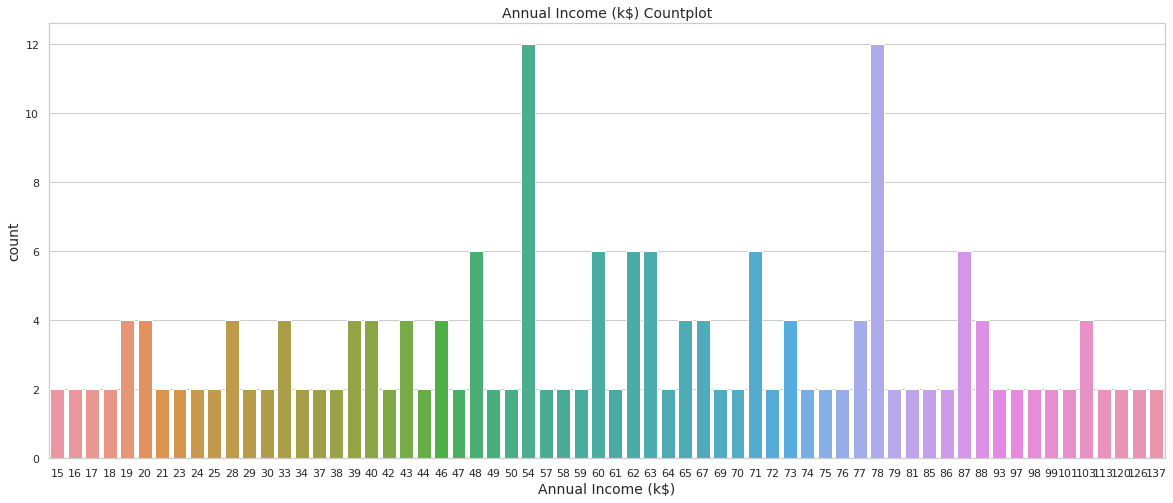

In [ ]:
# Countplot
plt.figure(figsize=(20,8))
sns.countplot(df['Annual_Income'])
plt.title("Annual Income (k$) Countplot", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

**Key Takeaway :**

- Mayoritas customer memiliki annual income berkisar di 50k - 80k dollar
- Dari kisaran 50-80k dollar tersebut, mayoritas customer memiliki annual income di 50k dan 78k dollar


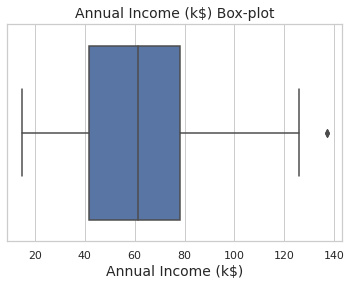

In [ ]:
# Box plot
sns.boxplot(df['Annual_Income'])
plt.title("Annual Income (k$) Box-plot",fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=14)
plt.show()

**Key Takeaway :**
 - Income tahunan customer skewed negative, mayoritas customer yang memiliki income di atas rata-ratanya
 - Diduga ada satu outlier customer dengan income 137k$

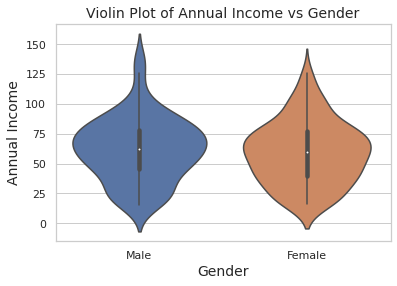

In [ ]:
# Violin Plot
sns.violinplot(y="Annual_Income", x ="Gender", data = df)
plt.title("Violin Plot of Annual Income vs Gender", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Annual Income", fontsize=14)
plt.show()

**Key Takeaway :**
- Income yang lebih dari 130 lebih banyak dimiliki oleh customer laki-laki
- Rata-rata income laki-laki lebih besar dari pada perempuan



In [ ]:
df.loc[df['Annual_Income'] > 130, ['Gender', 'Annual_Income']]

,Gender,Annual_Income
198,Male,137
199,Male,137


In [ ]:
df.groupby('Gender')['Annual_Income'].mean()

Gender
Female    59.250000
Male      62.227273
Name: Annual_Income, dtype: float64

**Spending Score**

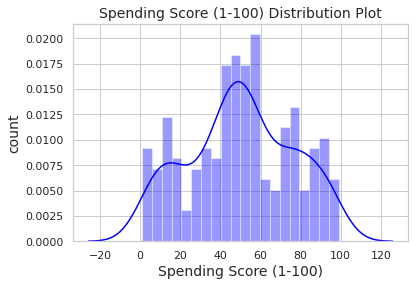

In [ ]:
# Distribution plot
sns.set(style="whitegrid")
sns.distplot(df['Spending_Score'], color = "blue", bins=20)
plt.title("Spending Score (1-100) Distribution Plot", fontsize=14)
plt.xlabel("Spending Score (1-100)", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

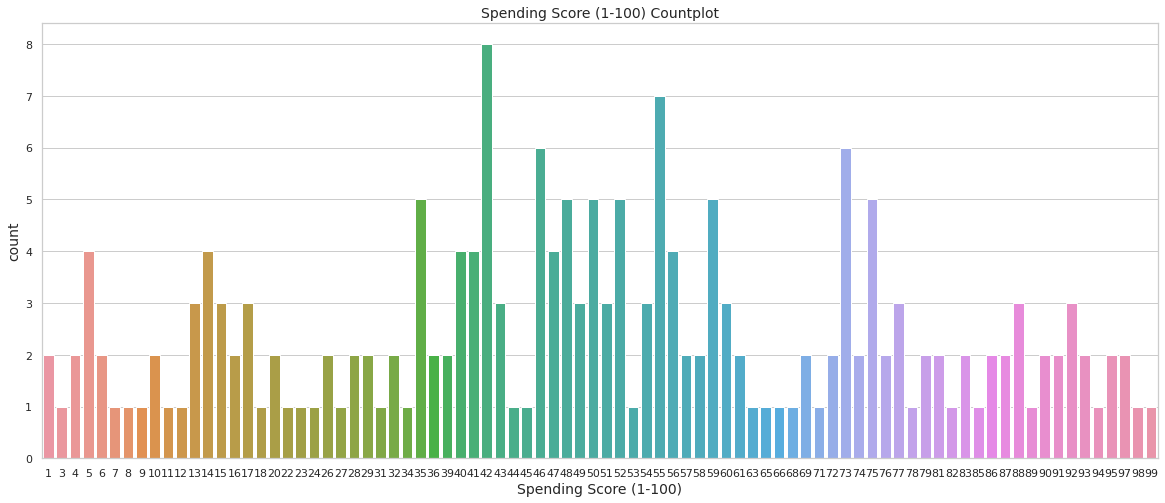

In [ ]:
# Countplot
plt.figure(figsize=(20,8))
sns.countplot(df['Spending_Score'])
plt.title("Spending Score (1-100) Countplot", fontsize=14)
plt.xlabel("Spending Score (1-100)", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

**Key Takeaway :**
- Spending score berkisar di 30-60

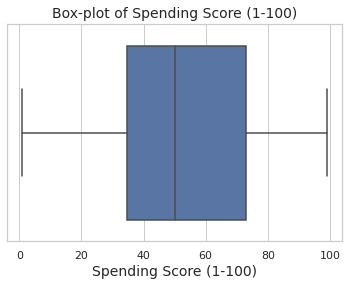

In [ ]:
# Boxplot
sns.boxplot(df['Spending_Score'])
plt.title("Box-plot of Spending Score (1-100)",fontsize=14)
plt.xlabel("Spending Score (1-100)", fontsize=14)
plt.show()

**Key Takeaway :**
- Skewed Positive, sehingga mayoritas customer sedikit dalam spending money

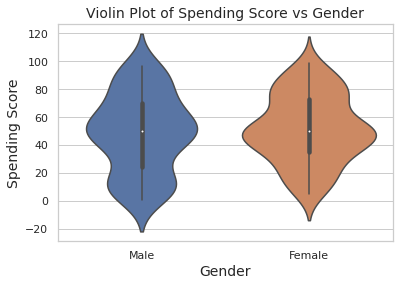

In [ ]:
# Violin Plot
sns.violinplot(y="Spending_Score", x ="Gender", data = df)
plt.title("Violin Plot of Spending Score vs Gender", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Spending Score", fontsize=14)
plt.show()

**Key Takeaway :**
- Skore daya laki-laki dan perempuan 40-50

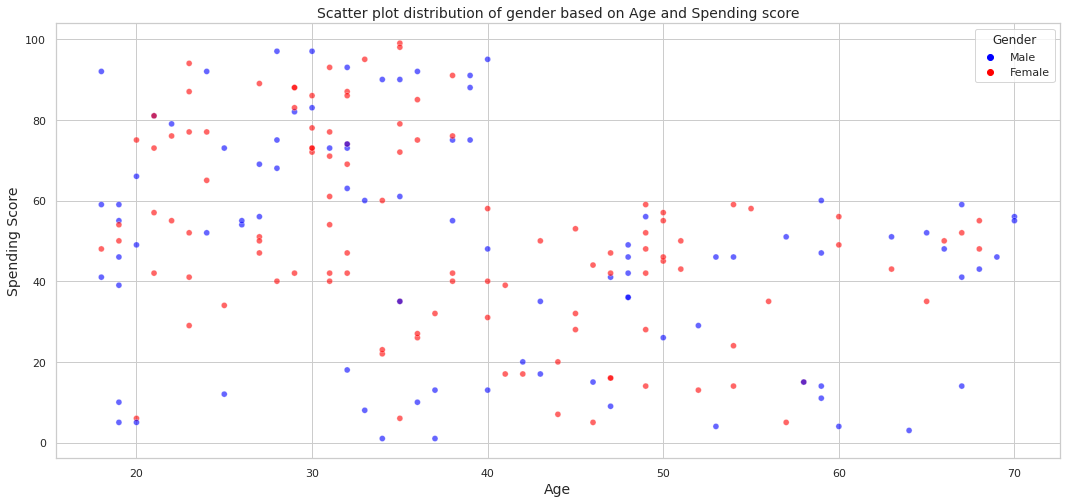

In [ ]:
# Scatter plot distribution of gender based on Age and spending score
plt.figure(figsize=(18,8))
sns.scatterplot(df['Age'], df['Spending_Score'], hue=df['Gender'], palette=['blue','red'], alpha=0.6)
plt.title("Scatter plot distribution of gender based on Age and Spending score",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Spending Score", fontsize=14)
plt.show()

**Key Takeaway :**
- Rata-rata spending score usia di bawah 40 tahun lebih tinggi dibandingkan rata-rata spending score usia di atas 40 tahun

# **Data Pre-processing**

In [ ]:
# change ID into index
df.set_index('CustomerID',inplace=True)

In [ ]:
#check new df
df

,Gender,Age,Annual_Income,Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [ ]:
# Copy Dataset
df1 = df.copy()

In [ ]:
# Label Encoder utk gender
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df1['Gender'] = le.fit_transform(df1['Gender'])
df1.head()

,Gender,Age,Annual_Income,Spending_Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


# **Clustering Based On 2 Features**

## Age and Spending Score

**K-Means & K-Means++**

In [ ]:
# Age_Spend
Age_Spend = df1[['Age','Spending_Score']].iloc[:,:].values


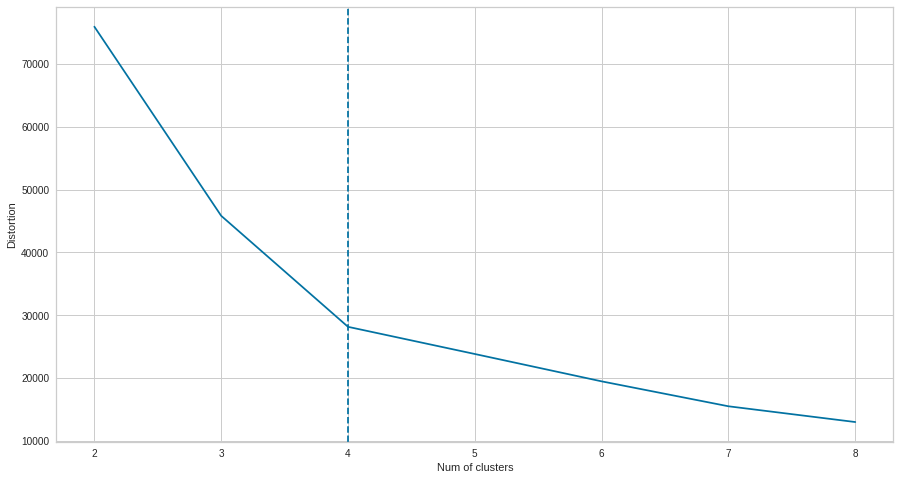

In [ ]:
# Elbow Method
inertia_list=[]

for i in range(2,9):
  kmeans_us = KMeans(n_clusters=i,n_init=10,max_iter=100, random_state=42)
  kmeans_us.fit(Age_Spend)
  inertia_list.append(kmeans_us.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(2,9),inertia_list)
plt.xlabel("Num of clusters")
plt.ylabel("Distortion")
plt.axvline(4, ls='--')
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

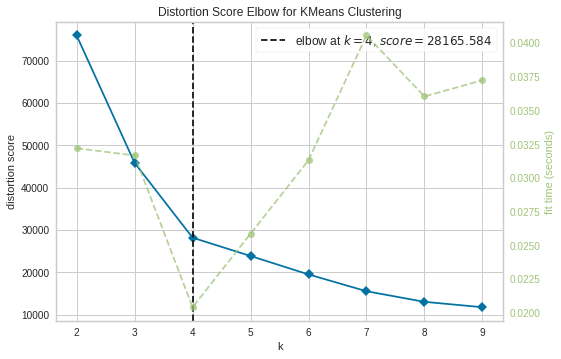

In [ ]:
kmeans_us = KMeans(n_init=10,max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans_us, k=(2,10))
visualizer.fit(Age_Spend)  
visualizer.show()

**Key Takeaway :**
- inertia mulai turun ekstrim pada k=4, sehingga ada 4 cluster yang terbentuk

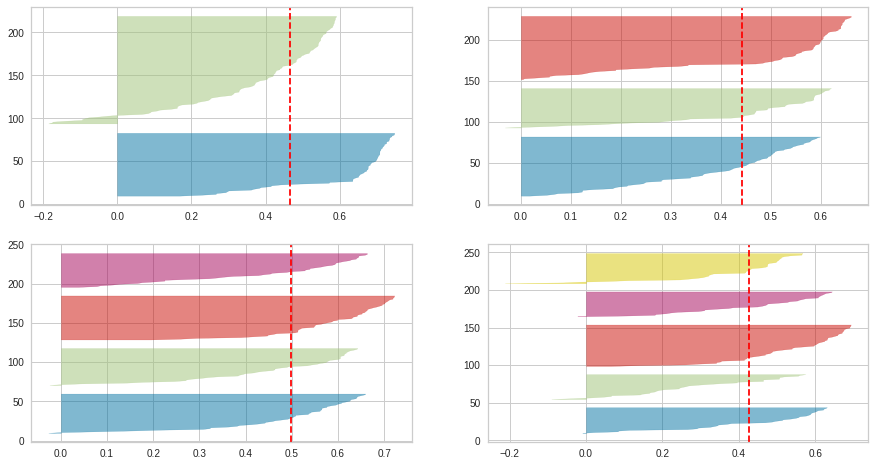

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMedoids(n_clusters=i, init='k-medoids++', max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(Age_Spend)

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.2 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids
labels_kmedoid = KMedoids(n_clusters=4, init='k-medoids++').fit_predict(Age_Spend)
labels_kmedoid

array([1, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 1, 2, 3, 1, 3,
       2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 0, 1,
       2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

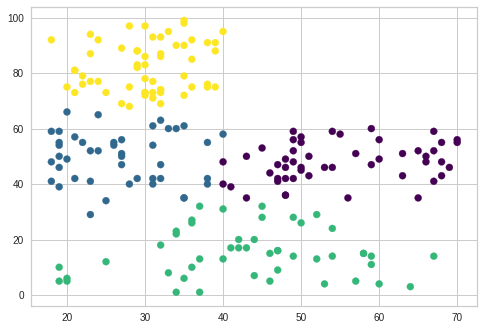

In [ ]:
df_kmedoids = df1.copy()
df_kmedoids['Cluster'] = labels_kmedoid
plt.scatter(df_kmedoids['Age'], df['Spending_Score'],c=df_kmedoids['Cluster'],cmap='viridis')

In [ ]:
labels_kmean = KMeans(init='k-means++',n_clusters=4).fit_predict(Age_Spend)
labels_kmean

array([1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0,
       2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 3, 1,
       2, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 0, 1, 0, 3, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

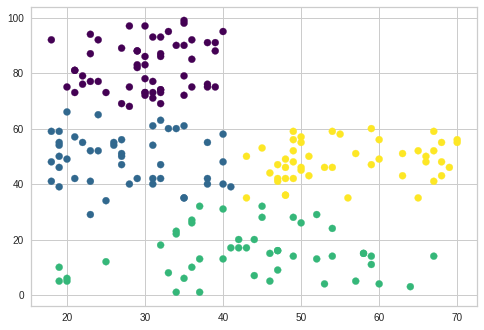

In [ ]:
df_kmeans = df1.copy()
df_kmeans['Cluster'] = labels_kmean
plt.scatter(df_kmeans['Age'], df['Spending_Score'],c=df_kmeans['Cluster'],cmap='viridis')

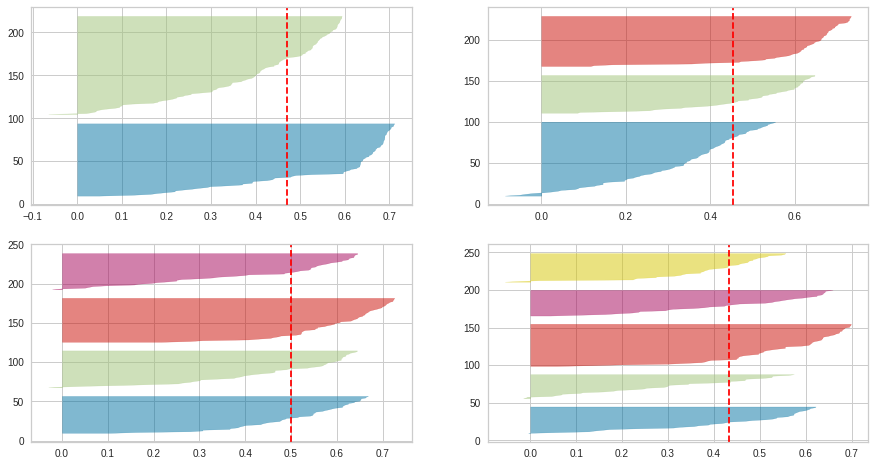

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(Age_Spend)

### Hierarchical Clustering

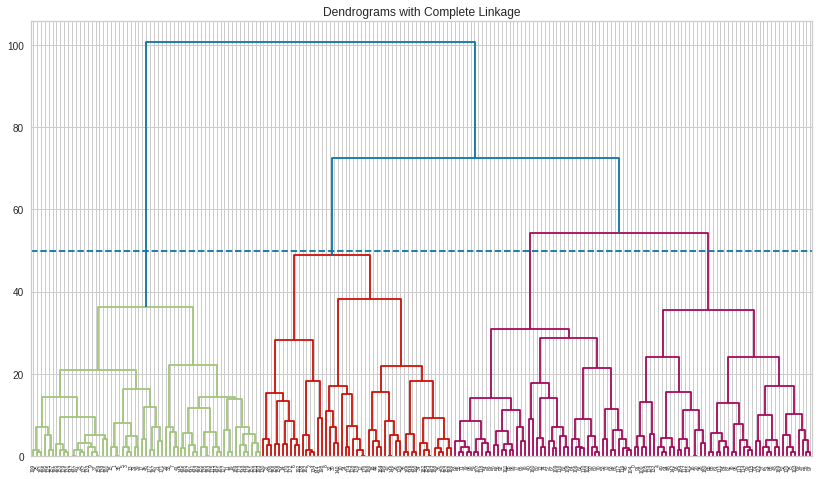

In [ ]:
import scipy.cluster.hierarchy as ch
from matplotlib import pyplot

#Complete Linkage
pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms with Complete Linkage")
dend = ch.dendrogram(ch.linkage(Age_Spend, method="complete"))
pyplot.axhline(y=50, ls='--')

**Key Takeaway :**
- Berdasarkan hal ini dapat diambil cluster = 4

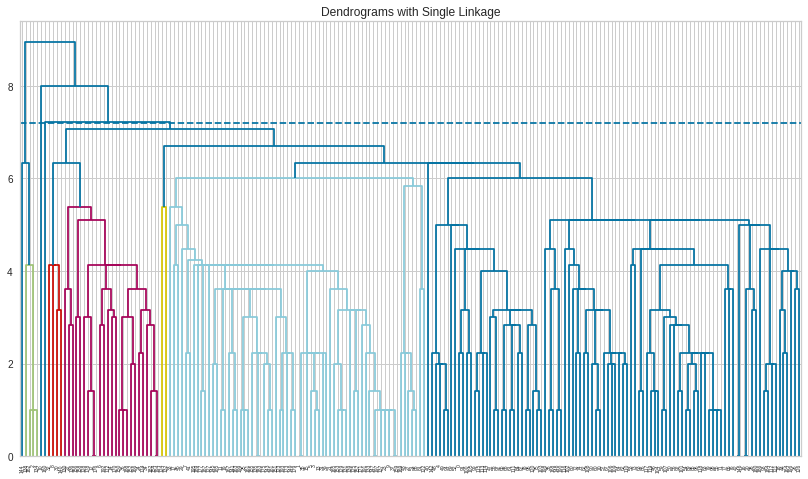

In [ ]:
#Single Linkage
pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms with Single Linkage")
dend1 = ch.dendrogram(ch.linkage(Age_Spend, method="single"))
plt.axhline(y=7.2, ls='--')

**Key Takeaway :**
- Berdasarkan hal ini dapat diambil cluster = 4


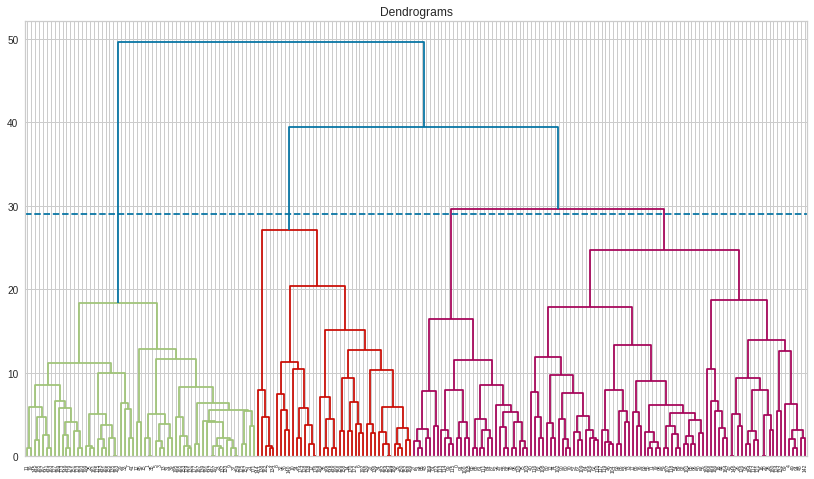

In [ ]:
#Average Linkage
pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend2 = ch.dendrogram(ch.linkage(Age_Spend, method="average"))
plt.axhline(y=29, ls='--')

**Key Takeaway :**
- Berdasarkan hal ini dapat diambil cluster = 4


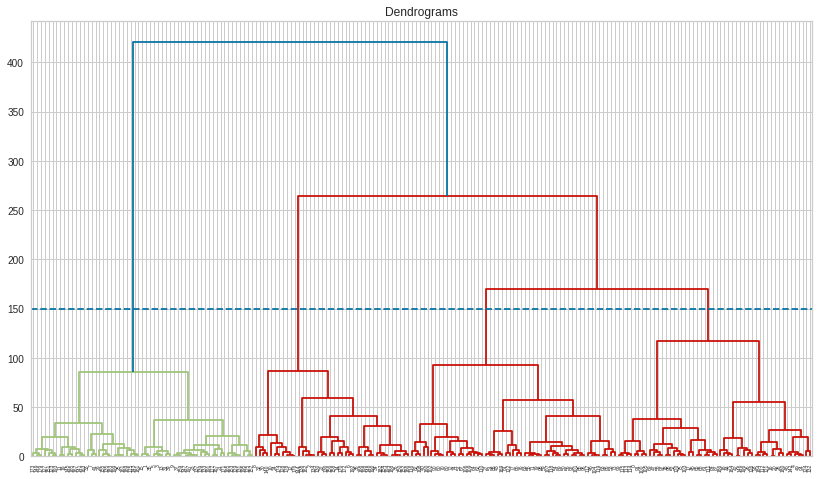

In [ ]:
#Ward Linkage
pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend3 = ch.dendrogram(ch.linkage(Age_Spend, method="ward"))
plt.axhline(y=150, ls='--')

In [ ]:
labels_cluster_hierarchical_ward = AgglomerativeClustering(n_clusters=4, linkage="ward").fit_predict(Age_Spend)
labels_cluster_hierarchical_complete = AgglomerativeClustering(n_clusters=4, linkage="complete").fit_predict(Age_Spend)
labels_cluster_hierarchical_single = AgglomerativeClustering(n_clusters=4, linkage="single").fit_predict(Age_Spend)
labels_cluster_hierarchical_average = AgglomerativeClustering(n_clusters=4, linkage="average").fit_predict(Age_Spend)

In [ ]:
labels_cluster_hierarchical_ward

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3])

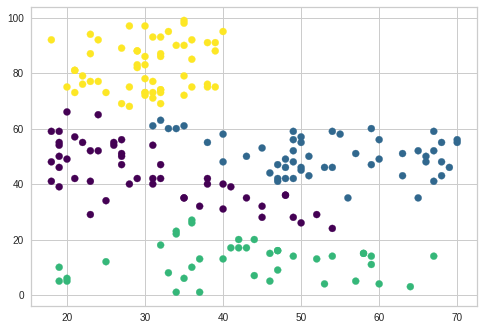

In [ ]:
df_ward = df1.copy()
df_ward['Cluster'] = labels_cluster_hierarchical_ward
plt.scatter(df_ward['Age'], df['Spending_Score'],c=df_ward['Cluster'],cmap='viridis')

In [ ]:
labels_cluster_hierarchical_complete

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 2,
       0, 1, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

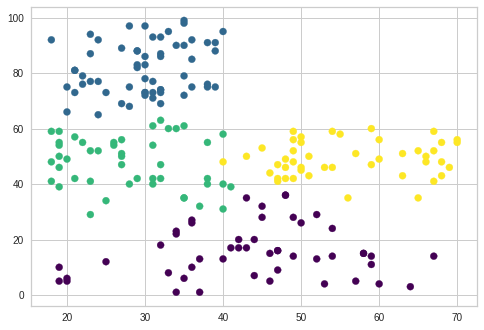

In [ ]:
df_complete = df1.copy()
df_complete['Cluster'] = labels_cluster_hierarchical_complete
plt.scatter(df_complete['Age'], df['Spending_Score'],c=df_complete['Cluster'],cmap='viridis')

In [ ]:
labels_cluster_hierarchical_single

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

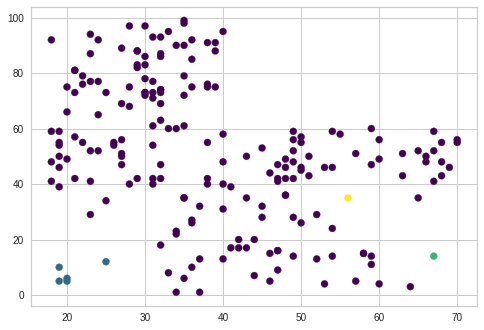

In [ ]:
df_single = df1.copy()
df_single['Cluster'] = labels_cluster_hierarchical_single
plt.scatter(df_single['Age'], df['Spending_Score'],c=df_single['Cluster'],cmap='viridis')

In [ ]:
labels_cluster_hierarchical_average

array([3, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 2, 3, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3,
       2, 1, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 1])

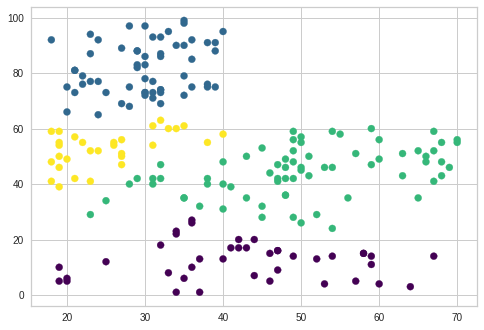

In [ ]:
df_average = df1.copy()
df_average['Cluster'] = labels_cluster_hierarchical_average
plt.scatter(df_average['Age'], df['Spending_Score'],c=df_average['Cluster'],cmap='viridis')

### **Silhouette Score and Davies Bouldin**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

print("Silhouette score of K-Medoids: ", silhouette_score(Age_Spend, labels_kmedoid), "\n")
print("Silhouette score of K-Means++: ", silhouette_score(Age_Spend, labels_kmean), "\n")
print("Silhouette score of Agglo Hierarchical Ward: ", silhouette_score(Age_Spend, labels_cluster_hierarchical_ward), "\n")
print("Silhouette score of Agglo Hierarchical Complete: ", silhouette_score(Age_Spend, labels_cluster_hierarchical_complete), "\n\n")

print("Davies Bouldin score of K-Medoids: ", davies_bouldin_score(Age_Spend, labels_kmedoid), "\n")
print("Davies Bouldin score of K-Means++: ", davies_bouldin_score(Age_Spend, labels_kmean), "\n")
print("Davies Bouldin score of Agglo Hierarchical Ward: ", davies_bouldin_score(Age_Spend, labels_cluster_hierarchical_ward), "\n")
print("Davies Bouldin score of Agglo Hierarchical Complete: ", davies_bouldin_score(Age_Spend, labels_cluster_hierarchical_complete), "\n\n")

Silhouette score of K-Medoids:  0.49922216642691913 

Silhouette score of K-Means++:  0.49973941540141753 

Silhouette score of Agglo Hierarchical Ward:  0.4602496389565028 

Silhouette score of Agglo Hierarchical Complete:  0.49294328457852726 


Davies Bouldin score of K-Medoids:  0.6885257651326195 

Davies Bouldin score of K-Means++:  0.6869328339833629 

Davies Bouldin score of Agglo Hierarchical Ward:  0.8629286547656256 

Davies Bouldin score of Agglo Hierarchical Complete:  0.6912818137334898 




**Key Takeaway :**
- Score terbaik di silhouette adalah kmeans++ 0.499 dan davies bouldin adalah agglo hierarchical ward 0.862


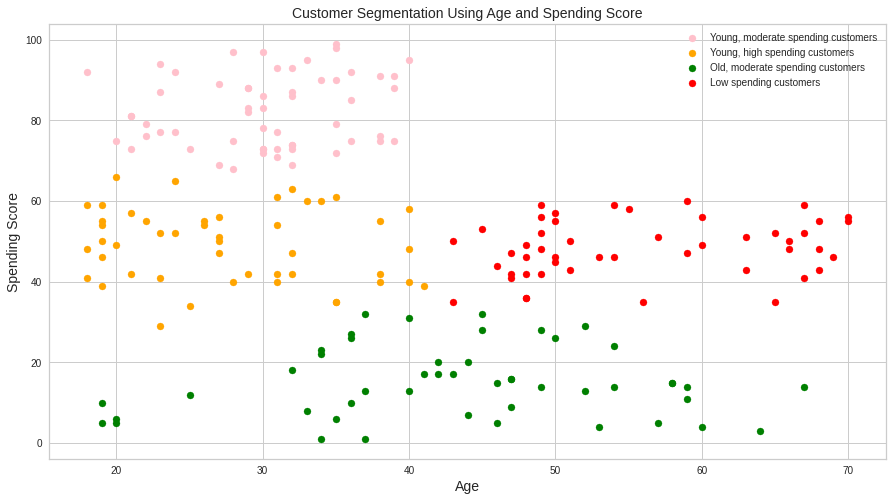

In [ ]:
#Scatter Plot
plt.figure(figsize=(15,8))
plt.scatter(Age_Spend[labels_kmean == 0,0], Age_Spend[labels_kmean == 0,1], c = 'pink', label="Young, moderate spending customers")
plt.scatter(Age_Spend[labels_kmean == 1,0], Age_Spend[labels_kmean == 1,1], c = 'orange', label='Young, high spending customers')
plt.scatter(Age_Spend[labels_kmean == 2,0], Age_Spend[labels_kmean == 2,1], c = 'green', label='Old, moderate spending customers')
plt.scatter(Age_Spend[labels_kmean == 3,0], Age_Spend[labels_kmean == 3,1], c = 'red', label='Low spending customers')
plt.legend()
plt.title('Customer Segmentation Using Age and Spending Score', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.show()

**Untuk mengembalikan hasil standard scaling ke nilai semula**

inverse_transform(prediction.reshape(-1,1)).reshape(-1)

**Key Takeaway :**

- cluster 0 = Young, moderate spending customers
- cluster 1 = Young, high spending customers
- cluster 2 = Old, moderate spending customers
- cluster 3 = Low spending customers

## Annual Income and Spending Score

**K-Means & K-Means++**

In [ ]:
# Annual Income & Spending Score
Ann_Income_Spend = df1[['Annual_Income','Spending_Score']].iloc[:,:].values

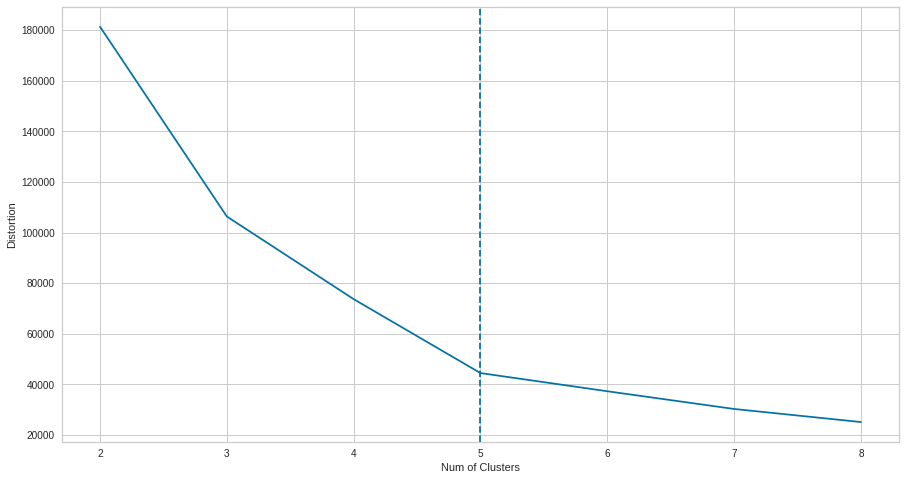

In [ ]:
# Elbow Method
inertia_list=[]

for i in range(2,9):
  kmeans_us = KMeans(n_clusters=i,n_init=10,max_iter=100, random_state=0)
  kmeans_us.fit(Ann_Income_Spend)
  inertia_list.append(kmeans_us.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(2,9),inertia_list)
plt.xlabel("Num of Clusters")
plt.ylabel("Distortion")
plt.axvline(x=5, ls='--')
plt.show()

**Key Takeaway :**
- Dapat dipilih nilai n cluster = 5 karena jatuh extream terakhir pada titik 5

In [ ]:
labels_kmedoid1 = KMedoids(n_clusters=5).fit_predict(Ann_Income_Spend)
labels_kmedoid1

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

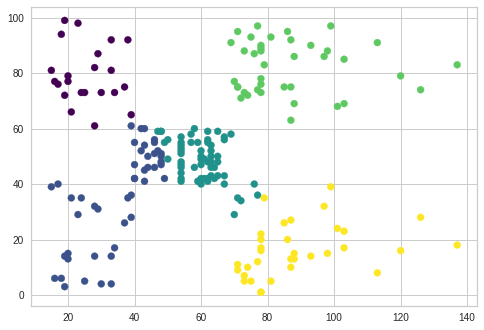

In [ ]:
df_kmedoid1 = df1.copy()
df_kmedoid1['Cluster'] = labels_kmedoid1
plt.scatter(df['Annual_Income'], df['Spending_Score'],c=df_kmedoid1['Cluster'],cmap='viridis')

In [ ]:
labels_kmean1 = KMeans(init='k-means++',n_clusters=5).fit_predict(Ann_Income_Spend)
labels_kmean1

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

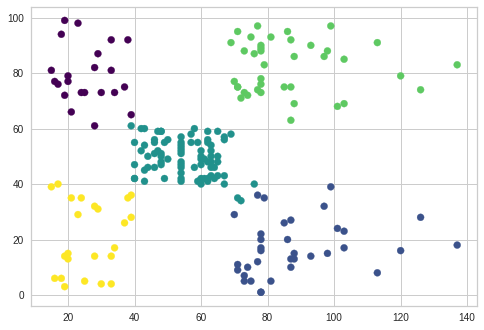

In [ ]:
df_kmean1 = df1.copy()
df_kmean1['Cluster'] = labels_kmean1
plt.scatter(df['Annual_Income'], df['Spending_Score'],c=df_kmean1['Cluster'],cmap='viridis')

### Hierarchical Clustering

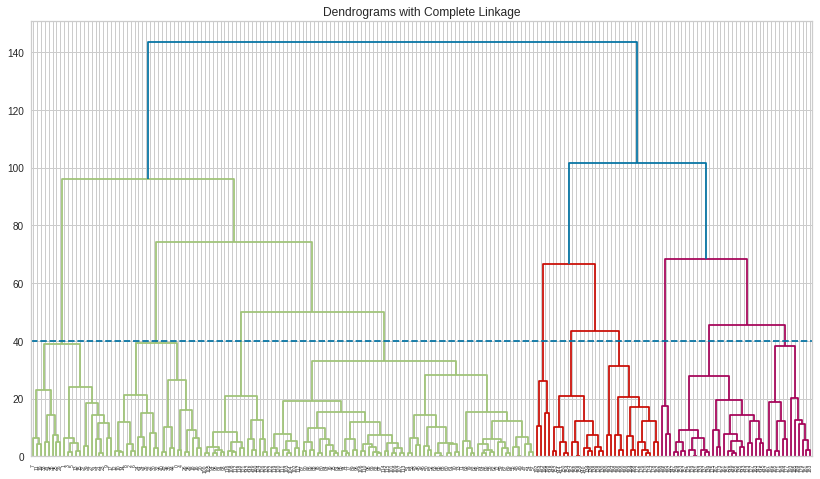

In [ ]:
pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms with Complete Linkage")
dend = ch.dendrogram(ch.linkage(Ann_Income_Spend, method="complete"))
pyplot.axhline(y=40, ls='--')

**Key Takeaway :**
- Berdasarkan dendogram dapat dipilih n cluster = 5

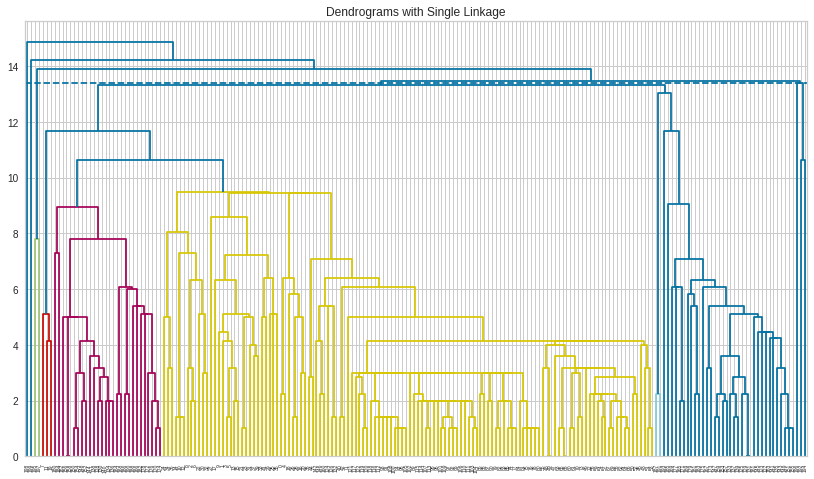

In [ ]:
pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms with Single Linkage")
dend1 = ch.dendrogram(ch.linkage(Ann_Income_Spend, method="single"))
pyplot.axhline(y=13.4, ls='--')

**Key Takeaway :**
- Berdasarkan dendogram dapat dipilih n cluster = 5

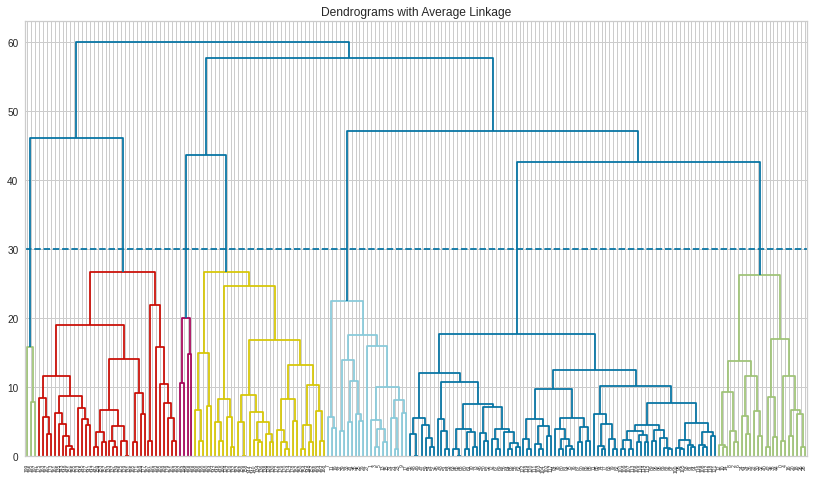

In [ ]:
pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms with Average Linkage")
dend2 = ch.dendrogram(ch.linkage(Ann_Income_Spend, method="average"))
pyplot.axhline(y=30, ls='--')

**Key Takeaway :**
- Berdasarkan dendogram dapat dipilih n cluster = 5

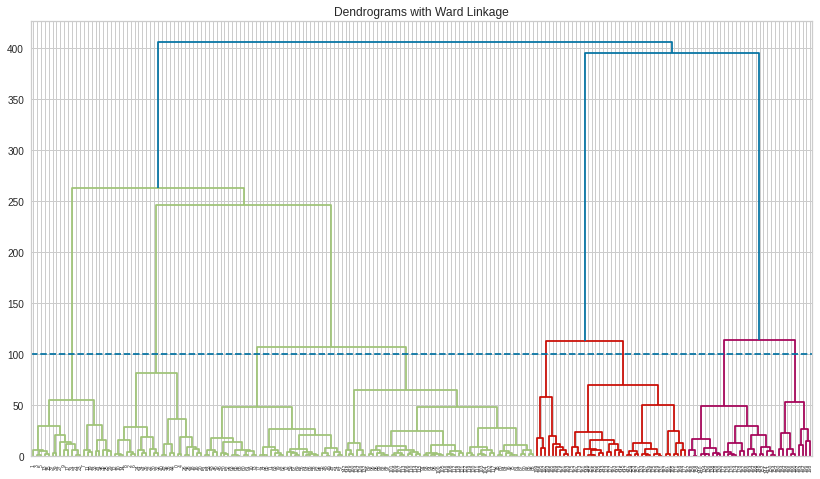

In [ ]:
pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms with Ward Linkage")
dend3 = ch.dendrogram(ch.linkage(Ann_Income_Spend, method="ward"))
pyplot.axhline(y=100, ls='--')

**Key Takeaway :**
- Berdasarkan dendogram dapat dipilih n cluster = 5

In [ ]:
labels_cluster_hierarchical_ward1 = AgglomerativeClustering(n_clusters=5, linkage="ward").fit_predict(Ann_Income_Spend)
labels_cluster_hierarchical_complete1 = AgglomerativeClustering(n_clusters=5, linkage="complete").fit_predict(Ann_Income_Spend)

In [ ]:
labels_cluster_hierarchical_ward1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
labels_cluster_hierarchical_complete1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

### Silhouette Score and Davies Bouldin

In [ ]:
print("Silhouette score of K-Medoids: ", silhouette_score(Ann_Income_Spend, labels_kmedoid1), "\n")
print("Silhouette score of K-Means++: ", silhouette_score(Ann_Income_Spend, labels_kmean1), "\n")
print("Silhouette score of Agglo Hierarchical Ward: ", silhouette_score(Ann_Income_Spend, labels_cluster_hierarchical_ward1), "\n")
print("Silhouette score of Agglo Hierarchical Complete: ", silhouette_score(Ann_Income_Spend, labels_cluster_hierarchical_complete1), "\n\n")

print("Davies Bouldin score of K-Medoids: ", davies_bouldin_score(Ann_Income_Spend, labels_kmedoid1), "\n")
print("Davies Bouldin score of K-Means++: ", davies_bouldin_score(Ann_Income_Spend, labels_kmean1), "\n")
print("Davies Bouldin score of Agglo Hierarchical Ward: ", davies_bouldin_score(Ann_Income_Spend, labels_cluster_hierarchical_ward1), "\n")
print("Davies Bouldin score of Agglo Hierarchical Complete: ", davies_bouldin_score(Ann_Income_Spend, labels_cluster_hierarchical_complete1), "\n\n")

Silhouette score of K-Medoids:  0.4468315848864226 

Silhouette score of K-Means++:  0.553931997444648 

Silhouette score of Agglo Hierarchical Ward:  0.5529945955148897 

Silhouette score of Agglo Hierarchical Complete:  0.5529945955148897 


Davies Bouldin score of K-Medoids:  0.7634480661738675 

Davies Bouldin score of K-Means++:  0.5725628995597087 

Davies Bouldin score of Agglo Hierarchical Ward:  0.5782207452369452 

Davies Bouldin score of Agglo Hierarchical Complete:  0.5782207452369452 




**Key Takeaway :**

n cluster optimum:
- Silhouette 0.554 kmeans
- davies bouldin score 0.763 kmedoids

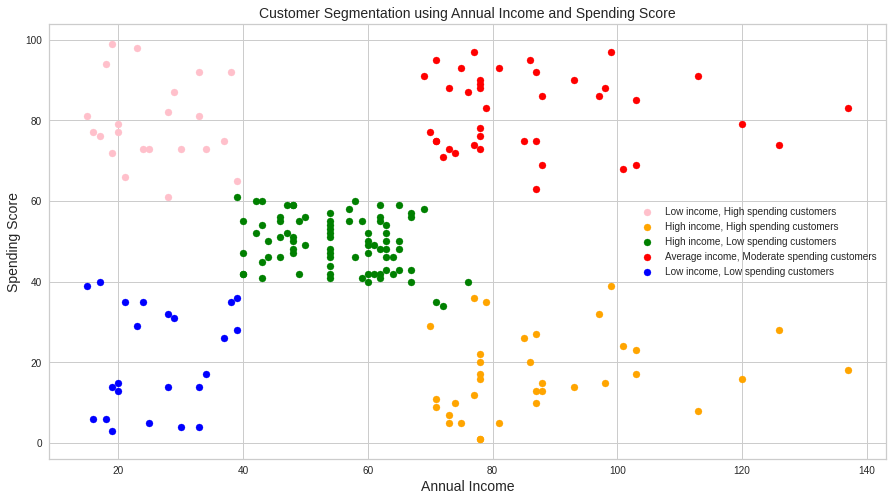

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(Ann_Income_Spend[labels_kmean1 == 0,0], Ann_Income_Spend[labels_kmean1 == 0,1], c = 'pink', label="Low income, High spending customers")
plt.scatter(Ann_Income_Spend[labels_kmean1 == 1,0], Ann_Income_Spend[labels_kmean1 == 1,1], c = 'orange', label='High income, High spending customers')
plt.scatter(Ann_Income_Spend[labels_kmean1 == 2,0], Ann_Income_Spend[labels_kmean1 == 2,1], c = 'green', label='High income, Low spending customers')
plt.scatter(Ann_Income_Spend[labels_kmean1 == 3,0], Ann_Income_Spend[labels_kmean1 == 3,1], c = 'red', label='Average income, Moderate spending customers')
plt.scatter(Ann_Income_Spend[labels_kmean1 == 4,0], Ann_Income_Spend[labels_kmean1 == 4,1], c = 'blue', label='Low income, Low spending customers')

plt.legend()
plt.title('Customer Segmentation using Annual Income and Spending Score', fontsize=14)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.show()

**Key Takeaway :**

- cluster 0 = Low income, High spending customers
- cluster 1 = High income, High spending customers
- cluster 2 = High income, Low spending customers
- cluster 3 = Average income, Moderate spending customers
- cluster 4 = Low income, Low spending customers